In [1]:
# Import modules
%matplotlib inline

import os

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

### Input uploading & Parameter Grid Search

In [2]:
bucket_root = os.environ['WORKSPACE_BUCKET']
print(bucket_root)


gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09


In [3]:
# find out the path to file by running gsutil commandline tool.

!gsutil ls gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification
    
!gsutil ls gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Kenny200\ high\ accuracy\ data\ and\ notebook

gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_Georgiev.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_MSA.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_ONEHOT.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Gx.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Gx_Complete.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Mx.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Mx_Complete.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Ox.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Ox_Complete.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2xx_Structure_Input.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classific

In [4]:
fileName = "x6Ox.csv"

## use the above file location information in the bucket
bucket_loc = "gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/"
!gsutil cp gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x6Ox.csv x6Ox.csv
    
input_df = pd.read_csv(fileName)
print ("(INFO) input uploaded\n")

input_df

Copying gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x6Ox.csv...
/ [1 files][ 16.1 KiB/ 16.1 KiB]                                                
Operation completed over 1 objects/16.1 KiB.                                     
(INFO) input uploaded



id Binding  OH1  OH2  OH3  OH4  OH5  OH6  OH7  OH8  OH9  OH10  OH11  \
0   VIAA       B    0    0    0    0    0    0    0    0    0     0     0   
1   AYGM       B    1    0    0    0    0    0    0    0    0     0     0   
2   VFGV       B    0    0    0    0    0    0    0    0    0     0     0   
3   VHFA       B    0    0    0    0    0    0    0    0    0     0     0   
4   VHGL       B    0    0    0    0    0    0    0    0    0     0     0   
..   ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
91  LNQV       N    0    0    0    0    0    0    0    0    0     1     0   
92  VDDF       N    0    0    0    0    0    0    0    0    0     0     0   
93  ATPV       N    1    0    0    0    0    0    0    0    0     0     0   
94  TDGR       N    0    0    0    0    0    0    0    0    0     0     0   
95  AATV       N    1    0    0    0    0    0    0    0    0     0     0   

    OH12  OH13  OH14  OH15  OH16  OH17  OH18  OH19  OH20  OH21  OH22  OH23  \
0      0     0     0     0     0     0     1     0     0     0     0     0   
1      0     0     0     0     0     0     0     0     0     0     0     0   
2      0     0     0     0     0     0     1     0     0     0     0     0   
3      0     0     0     0     0     0     1     0     0     0     0     0   
4      0     0     0     0     0     0     1     0     0     0     0     0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
91     0     0     0     0     0     0     0     0     0     0     0     0   
92     0     0     0     0     0     0     1     0     0     0     0     1   
93     0     0     0     0     0     0     0     0     0     0     0     0   
94     0     0     0     0     0     1     0     0     0     0     0     1   
95     0     0     0     0     0     0     0     0     0     1     0     0   

    OH24  OH25  OH26  OH27  OH28  OH29  OH30  OH31  OH32  OH33  OH34  OH35  \
0      0     0     0     0     1     0     0     0     0     0     0     0   
1      0     0     0     0     0     0     0     0     0     0     0     0   
2      0     1     0     0     0     0     0     0     0     0     0     0   
3      0     0     0     1     0     0     0     0     0     0     0     0   
4      0     0     0     1     0     0     0     0     0     0     0     0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
91     0     0     0     0     0     0     0     0     1     0     0     0   
92     0     0     0     0     0     0     0     0     0     0     0     0   
93     0     0     0     0     0     0     0     0     0     0     0     0   
94     0     0     0     0     0     0     0     0     0     0     0     0   
95     0     0     0     0     0     0     0     0     0     0     0     0   

    OH36  OH37  OH38  OH39  OH40  OH41  OH42  OH43  OH44  OH45  OH46  OH47  \
0      0     0     0     0     0     1     0     0     0     0     0     0   
1      0     0     0     0     1     0     0     0     0     0     1     0   
2      0     0     0     0     0     0     0     0     0     0     1     0   
3      0     0     0     0     0     0     0     0     0     1     0     0   
4      0     0     0     0     0     0     0     0     0     0     1     0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
91     0     0     0     0     0     0     0     0     0     0     0     0   
92     0     0     0     0     0     0     0     1     0     0     0     0   
93     0     1     0     0     0     0     0     0     0     0     0     0   
94     0     0     0     0     0     0     0     0     0     0     1     0   
95     0     0     0     0     0     0     0     0     0     0     0     0   

    OH48  OH49  OH50  OH51  OH52  OH53  OH54  OH55  OH56  OH57  OH58  OH59  \
0      0     0     0     0     0     0     0     0     0     0     0     0   
1      0     0     0     0     0     0     0     0     0     0     0     0   
2      0     0     0     0     0    

In [5]:
# Setting 'id_number' as our index
input_df.set_index('id', inplace=True) 
# Converted to binary to help later on with models and plots
input_df['Binding'] = input_df['Binding'].map({'B':1, 'N':0})

print ("(INFO) input\n")
input_df

(INFO) input



Binding  OH1  OH2  OH3  OH4  OH5  OH6  OH7  OH8  OH9  OH10  OH11  OH12  \
id                                                                             
VIAA        1    0    0    0    0    0    0    0    0    0     0     0     0   
AYGM        1    1    0    0    0    0    0    0    0    0     0     0     0   
VFGV        1    0    0    0    0    0    0    0    0    0     0     0     0   
VHFA        1    0    0    0    0    0    0    0    0    0     0     0     0   
VHGL        1    0    0    0    0    0    0    0    0    0     0     0     0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
LNQV        0    0    0    0    0    0    0    0    0    0     1     0     0   
VDDF        0    0    0    0    0    0    0    0    0    0     0     0     0   
ATPV        0    1    0    0    0    0    0    0    0    0     0     0     0   
TDGR        0    0    0    0    0    0    0    0    0    0     0     0     0   
AATV        0    1    0    0    0    0    0    0    0    0     0     0     0   

      OH13  OH14  OH15  OH16  OH17  OH18  OH19  OH20  OH21  OH22  OH23  OH24  \
id                                                                             
VIAA     0     0     0     0     0     1     0     0     0     0     0     0   
AYGM     0     0     0     0     0     0     0     0     0     0     0     0   
VFGV     0     0     0     0     0     1     0     0     0     0     0     0   
VHFA     0     0     0     0     0     1     0     0     0     0     0     0   
VHGL     0     0     0     0     0     1     0     0     0     0     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
LNQV     0     0     0     0     0     0     0     0     0     0     0     0   
VDDF     0     0     0     0     0     1     0     0     0     0     1     0   
ATPV     0     0     0     0     0     0     0     0     0     0     0     0   
TDGR     0     0     0     0     1     0     0     0     0     0     1     0   
AATV     0     0     0     0     0     0     0     0     1     0     0     0   

      OH25  OH26  OH27  OH28  OH29  OH30  OH31  OH32  OH33  OH34  OH35  OH36  \
id                                                                             
VIAA     0     0     0     1     0     0     0     0     0     0     0     0   
AYGM     0     0     0     0     0     0     0     0     0     0     0     0   
VFGV     1     0     0     0     0     0     0     0     0     0     0     0   
VHFA     0     0     1     0     0     0     0     0     0     0     0     0   
VHGL     0     0     1     0     0     0     0     0     0     0     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
LNQV     0     0     0     0     0     0     0     1     0     0     0     0   
VDDF     0     0     0     0     0     0     0     0     0     0     0     0   
ATPV     0     0     0     0     0     0     0     0     0     0     0     0   
TDGR     0     0     0     0     0     0     0     0     0     0     0     0   
AATV     0     0     0     0     0     0     0     0     0     0     0     0   

      OH37  OH38  OH39  OH40  OH41  OH42  OH43  OH44  OH45  OH46  OH47  OH48  \
id                                                                             
VIAA     0     0     0     0     1     0     0     0     0     0     0     0   
AYGM     0     0     0     1     0     0     0     0     0     1     0     0   
VFGV     0     0     0     0     0     0     0     0     0     1     0     0   
VHFA     0     0     0     0     0     0     0     0     1     0     0     0   
VHGL     0     0     0     0     0     0     0     0     0     1     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
LNQV     0     0     0     0     0     0     0     0     0     0     0     0   
VDDF     0     0     0     0     0     0     1     0     0     0     0     0   
ATPV     1     0     0     0     0     0     0     0     0     0     0     0   
TDG

In [6]:
# sanity check
print("Here's the dimensions of input:\n", 
     input_df.shape)
print("Here's the data types:\n",
     input_df.dtypes)

Here's the dimensions of input:
 (96, 81)
Here's the data types:
 Binding    int64
OH1        int64
OH2        int64
OH3        int64
OH4        int64
           ...  
OH76       int64
OH77       int64
OH78       int64
OH79       int64
OH80       int64
Length: 81, dtype: object


In [7]:
X = input_df.iloc[:, input_df.columns != 'Binding']
y = input_df.iloc[:, input_df.columns == 'Binding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
print (input_df['Binding'].value_counts())

0    82
1    14
Name: Binding, dtype: int64


In [9]:
print (X_train.head(), y_train.head(), X_test.head(), y_test.head())

      OH1  OH2  OH3  OH4  OH5  OH6  OH7  OH8  OH9  OH10  OH11  OH12  OH13  \
id                                                                          
ANSV    1    0    0    0    0    0    0    0    0     0     0     0     0   
VCGV    0    0    0    0    0    0    0    0    0     0     0     0     0   
LEAM    0    0    0    0    0    0    0    0    0     1     0     0     0   
MNGV    0    0    0    0    0    0    0    0    0     0     1     0     0   
FEGI    0    0    0    0    1    0    0    0    0     0     0     0     0   

      OH14  OH15  OH16  OH17  OH18  OH19  OH20  OH21  OH22  OH23  OH24  OH25  \
id                                                                             
ANSV     0     0     0     0     0     0     0     0     0     0     0     0   
VCGV     0     0     0     0     1     0     0     0     1     0     0     0   
LEAM     0     0     0     0     0     0     0     0     0     0     1     0   
MNGV     0     0     0     0     0     0     0     0     0  

In [10]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [11]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train.values.ravel())
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  40.97


### ML Training

In [12]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = None, 
                  max_depth = 4)

RandomForestClassifier(max_depth=4, max_features=None, random_state=42)

In [13]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train.values.ravel())

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [14]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

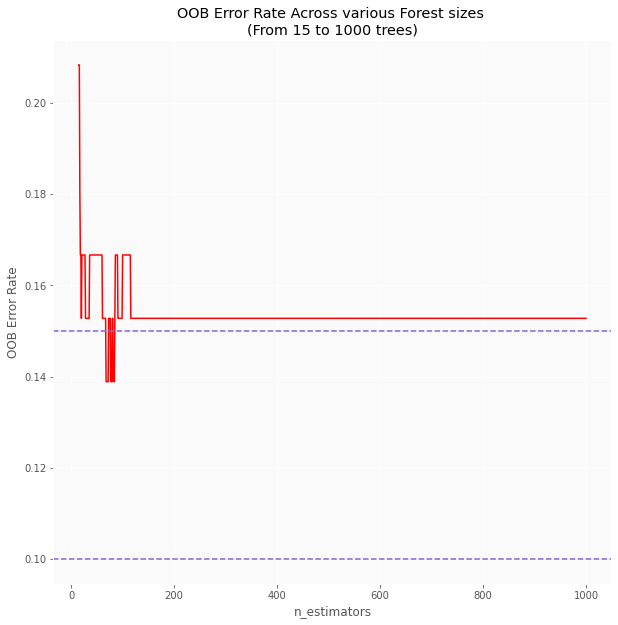

In [15]:
## test_size = 0.25, cv=5

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.15, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.1, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

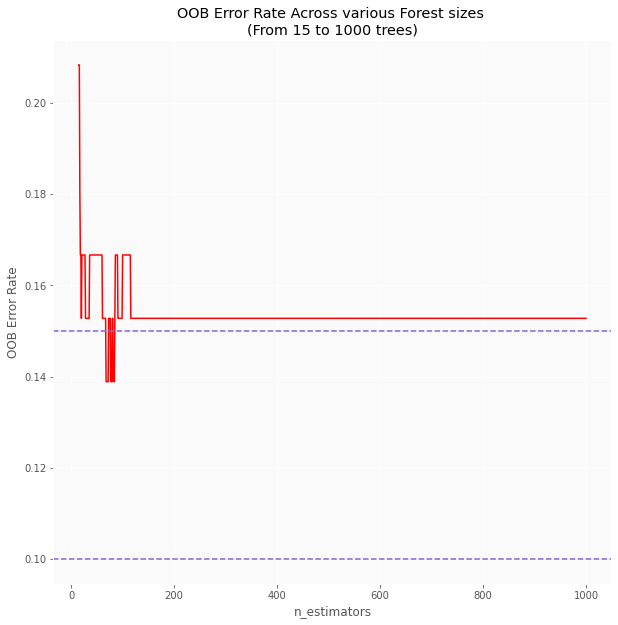

In [16]:
## test_size = 0.2, cv=10 results

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.15, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.1, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [17]:
fit_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=400,
                       random_state=42)

In [18]:
fit_rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=400,
                       random_state=42)

In [19]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [20]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [21]:
print (var_imp_rf)

{'importance': array([0.00447556, 0.05992375, 0.        , 0.        , 0.00511721,
       0.        , 0.        , 0.00102457, 0.        , 0.0166707 ,
       0.03750133, 0.        , 0.        , 0.04534243, 0.        ,
       0.00167373, 0.        , 0.05390473, 0.        , 0.        ,
       0.00253729, 0.06930791, 0.05363133, 0.00504914, 0.06180444,
       0.00423898, 0.05913832, 0.        , 0.        , 0.        ,
       0.        , 0.00660917, 0.00712789, 0.00202014, 0.        ,
       0.02878347, 0.        , 0.        , 0.07210616, 0.02148287,
       0.00586219, 0.00203637, 0.00240022, 0.        , 0.08083943,
       0.16017636, 0.00069304, 0.        , 0.        , 0.        ,
       0.        , 0.00042188, 0.        , 0.00085602, 0.        ,
       0.00039239, 0.00171756, 0.00144099, 0.        , 0.        ,
       0.02540922, 0.        , 0.        , 0.        , 0.00896592,
       0.        , 0.        , 0.00270372, 0.        , 0.00152021,
       0.0640884 , 0.00112216, 0.        , 0.  

In [22]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      name_index[indices[i]],
                      importance[indices[f]]))

In [23]:
print (input_df.columns[1:])

Index(['OH1', 'OH2', 'OH3', 'OH4', 'OH5', 'OH6', 'OH7', 'OH8', 'OH9', 'OH10',
       'OH11', 'OH12', 'OH13', 'OH14', 'OH15', 'OH16', 'OH17', 'OH18', 'OH19',
       'OH20', 'OH21', 'OH22', 'OH23', 'OH24', 'OH25', 'OH26', 'OH27', 'OH28',
       'OH29', 'OH30', 'OH31', 'OH32', 'OH33', 'OH34', 'OH35', 'OH36', 'OH37',
       'OH38', 'OH39', 'OH40', 'OH41', 'OH42', 'OH43', 'OH44', 'OH45', 'OH46',
       'OH47', 'OH48', 'OH49', 'OH50', 'OH51', 'OH52', 'OH53', 'OH54', 'OH55',
       'OH56', 'OH57', 'OH58', 'OH59', 'OH60', 'OH61', 'OH62', 'OH63', 'OH64',
       'OH65', 'OH66', 'OH67', 'OH68', 'OH69', 'OH70', 'OH71', 'OH72', 'OH73',
       'OH74', 'OH75', 'OH76', 'OH77', 'OH78', 'OH79', 'OH80'],
      dtype='object')


In [24]:
# For later use in CART models
names_index = input_df.columns[1:]

In [25]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'OH46' has a Mean Decrease in Impurity of 0.16018
2. The feature 'OH45' has a Mean Decrease in Impurity of 0.08084
3. The feature 'OH39' has a Mean Decrease in Impurity of 0.07211
4. The feature 'OH22' has a Mean Decrease in Impurity of 0.06931
5. The feature 'OH71' has a Mean Decrease in Impurity of 0.06409
6. The feature 'OH25' has a Mean Decrease in Impurity of 0.06180
7. The feature 'OH2' has a Mean Decrease in Impurity of 0.05992
8. The feature 'OH27' has a Mean Decrease in Impurity of 0.05914
9. The feature 'OH18' has a Mean Decrease in Impurity of 0.05390
10. The feature 'OH23' has a Mean Decrease in Impurity of 0.05363
11. The feature 'OH14' has a Mean Decrease in Impurity of 0.04534
12. The feature 'OH11' has a Mean Decrease in Impurity of 0.03750
13. The feature 'OH36' has a Mean Decrease in Impurity of 0.02878
14. The feature 'OH61' has a Mean Decrease in Impurity of 0.02541
15. The feature 'OH40' has a Mean Decrease in Impurity of 0.02148
16.

In [26]:
def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True, n_splits=10):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including 
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model 
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues 
                      for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as 
                      variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
                from cross validation score's standard deviation)
    """
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(fit, 
                         training_set, 
                         class_set, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
       
        
    else:
        return scores.mean(), scores.std() / 2

In [27]:
cross_val_metrics(fit_rf, 
                  X_train, 
                  y_train.values.ravel(), 
                  'rf',
                  print_results = True, n_splits=5)

Cross validation run 0:  0.867
Cross validation run 1:  0.933
Cross validation run 2:  0.786
Cross validation run 3:  0.929
Cross validation run 4:  0.786
Accuracy:  0.860 (+/-  0.033)


In [28]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

In [29]:
y_pred = fit_rf.predict(X_test)

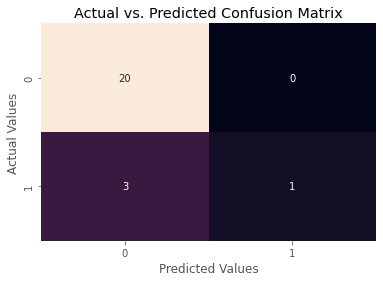

In [30]:
conf_mat = create_conf_mat(y_test.values.ravel(), y_pred.ravel())
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [31]:
accuracy_rf = fit_rf.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.875


In [32]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1250


In [33]:
def print_class_report(y_pred, y_test, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(y_pred, 
            y_test))

In [34]:
class_report = print_class_report( y_test, y_pred, 'Random Forest')


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.25      0.40         4

    accuracy                           0.88        24
   macro avg       0.93      0.62      0.67        24
weighted avg       0.89      0.88      0.84        24



In [35]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test, predictions_prob, pos_label = 1)

In [36]:
auc_rf = auc(fpr2, tpr2)

In [37]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

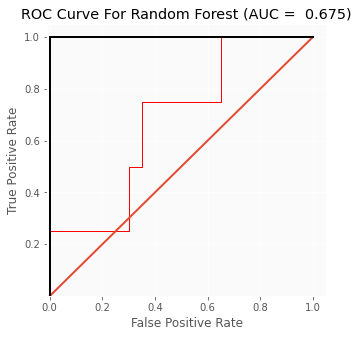

In [38]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

plot_roc_curve(fpr2, tpr2, auc_rf, 'rf', 
               xlim=(-0.01, 0.2), 
               ylim=(0.85, 1.01))